# Imersão de Dados Alura
## Projeto: Prever valores de imóveis dos bairros da cidade de São Paulo

# Importando as bibliotecas utilizadas durante o projeto

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, r2_score

from numpy import isnan
from sklearn.impute import KNNImputer

# Carregando a base de dados e realizando uma análise prévia

## Base de dados original: https://www.kaggle.com/datasets/kaggleshashankk/house-price-data-of-sao-paulo
## Utilizarei a base de dados tratada durante as aulas da imersão 

In [48]:
# formatando a saida dos numeros float
# e a quantidade de colunas a serem exibidas
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', 34)

- **thousands:** escolhe o separador dos milhares

- **decimal:** escolha o separador dos decimais

In [49]:
dados = pd.read_csv('dados/dados_vendas_censo.csv', 
                    thousands= '.', 
                    decimal= ',')

In [50]:
dados.head()

,Unnamed: 0,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_anuncio,Tipo_anuncio,Valor_mm,Valor_m2,rua,cep,latitude,longitude,...,setor_censo,Cod_setor,Nome_do_distrito,Situacao_setor,Tipo_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,70000000,NaN,70,70000,Avenida Itacira,40610000,-236157934,-466481622,...,3550308770000670.00,3550308770000670.00,SAï¿½DE,10.00,0.00,1640.00,4370.00,266.00,204.00,315896.00,2221064493.00,557065.00,2577081697.00,209619.00,1302985156.00,393035.00,1724157674.00
1,1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,37000000,NaN,37,7459677419354839,Rua Aurelia Perez Alvarez,46420200,-236409612,-466883114,...,3550308710000230.00,3550308710000230.00,SANTO AMARO,10.00,0.00,1360.00,4250.00,313.00,196.00,760044.00,3677893017.00,789053.00,3588690664.00,41490.00,267606829.00,606392.00,275026749.00
2,2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,3800000,NaN,38,30400,Rua Alba Valdez,48452000,-2375299,-466958895,...,3550308300000500.00,3550308300000500.00,GRAJAï¿½,10.00,0.00,1420.00,4930.00,347.00,306.00,80513.00,76918878.00,101175.00,75743342.00,51877.00,42667278.00,85851.00,41437888.00
3,3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,5400000,NaN,54,54000,Rua Tobias Barreto,31760000,-235499597,-465881729,...,3550308080000500.00,3550308080000500.00,BELï¿½M,10.00,0.00,1560.00,4680.00,30.00,199.00,233805.00,782637015.00,244789.00,792583976.00,154329.00,464656616.00,190904.00,505071269.00
4,4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000,19800000,NaN,198,45000,Rua Graham Bell,47370300,-235937964,-467600773,...,3550308650001690.00,3550308650001690.00,RAPOSO TAVARES,10.00,0.00,1070.00,3760.00,351.00,231.00,102636.00,27216867.00,114396.00,16773364.00,73567.00,36708808.00,108694.00,15962246.00


In [51]:
# não faz sentido manter as colunas Tipo_anuncio (somente valores nulos), Rua (já temos a coluna rua com dados completos e formatados)
## Unnamed: 0 (duplicidade dos indices)
dados.drop(columns = ['Tipo_anuncio', 'Unnamed: 0', 'Rua'], inplace = True)

### Quantidade de registros, dados não nulos e o tipo dos dados de cada coluna

In [52]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5605 entries, 0 to 5604
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Bairro            5597 non-null   object 
 1   Cidade            5605 non-null   object 
 2   Metragem          5605 non-null   int64  
 3   Quartos           5605 non-null   int64  
 4   Banheiros         5605 non-null   int64  
 5   Vagas             5605 non-null   int64  
 6   Valor             5605 non-null   object 
 7   Valor_anuncio     5605 non-null   int64  
 8   Valor_mm          5605 non-null   int64  
 9   Valor_m2          5605 non-null   int64  
 10  rua               5605 non-null   object 
 11  cep               5605 non-null   int64  
 12  latitude          5605 non-null   int64  
 13  longitude         5605 non-null   int64  
 14  Point             5605 non-null   object 
 15  setor_censo       5320 non-null   float64
 16  Cod_setor         5316 non-null   float64


### Quantidade de dados nulos por coluna

In [53]:
dados.isna().sum()

Bairro                8
Cidade                0
Metragem              0
Quartos               0
Banheiros             0
Vagas                 0
Valor                 0
Valor_anuncio         0
Valor_mm              0
Valor_m2              0
rua                   0
cep                   0
latitude              0
longitude             0
Point                 0
setor_censo         285
Cod_setor           289
Nome_do_distrito    289
Situacao_setor      289
Tipo_setor          289
V001                289
V002                289
V003                289
V004                289
V005                289
V006                289
V007                289
V008                289
V009                289
V010                289
V011                289
V012                289
dtype: int64

In [54]:
dados[dados['Bairro'].isna()]

,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_anuncio,Valor_mm,Valor_m2,rua,cep,latitude,longitude,Point,setor_censo,Cod_setor,Nome_do_distrito,Situacao_setor,Tipo_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
4454,NaN,São Paulo,103,3,2,2,R$ 640.000,6400000,64,6213592233009709,Rua Vergueiro,15040000,-235660747,-466396255,POINT (-46.6396255 -23.5660747),3550308490000860.00,3550308490000860.00,LIBERDADE,10.00,0.00,4840.00,10730.00,222.00,123.00,451888.00,14085041493.00,51462.00,15721391788.00,315024.00,7377118315.00,418054.00,9361775891.00
4477,NaN,São Paulo,678,4,8,8,R$ 6.895.000,68950000,6895,10169616519174042,Rua Alvorada do Sul,56120100,-235928567,-467086463,POINT (-46.7086463 -23.5928567),3550308540001170.00,3550308540001170.00,MORUMBI,10.00,0.00,1100.00,4070.00,37.00,247.00,1361218.00,5237088143.00,1426038.00,4555626524.00,699664.00,5521026623.00,1013853.00,4812193533.00
4540,NaN,São Paulo,550,3,5,6,R$ 4.000.000,40000000,40,7272727272727273,Rua Professor Eduardo Monteiro,56141200,-235955858,-467106558,POINT (-46.7106558 -23.5955858),3550308540000050.00,3550308540000050.00,MORUMBI,10.00,0.00,910.00,3170.00,348.00,194.00,1555165.00,21696666059.00,1626667.00,21529192481.00,728337.00,11611662038.00,952934.00,13058461239.00
4740,NaN,São Paulo,694,4,6,6,R$ 3.890.000,38900000,389,5605187319884726,Avenida Comendador Adibo Ares,56130000,-235947216,-467092658,POINT (-46.7092658 -23.5947216),3550308540000640.00,3550308540000640.00,MORUMBI,10.00,0.00,370.00,1320.00,357.00,286.00,1379757.00,263531677447.00,340340.00,60386073400.00,374857.00,62868952357.00,111763.00,181334987282.00
4765,NaN,São Paulo,683,4,8,8,R$ 6.895.000,68950000,6895,10095168374816983,Rua Alvorada do Sul,56120100,-235928567,-467086463,POINT (-46.7086463 -23.5928567),3550308540001170.00,3550308540001170.00,MORUMBI,10.00,0.00,1100.00,4070.00,37.00,247.00,1361218.00,5237088143.00,1426038.00,4555626524.00,699664.00,5521026623.00,1013853.00,4812193533.00
4898,NaN,São Paulo,555,3,5,6,R$ 4.000.000,40000000,40,7207207207207207,Rua Professor Eduardo Monteiro,56141200,-235955858,-467106558,POINT (-46.7106558 -23.5955858),3550308540000050.00,3550308540000050.00,MORUMBI,10.00,0.00,910.00,3170.00,348.00,194.00,1555165.00,21696666059.00,1626667.00,21529192481.00,728337.00,11611662038.00,952934.00,13058461239.00
5158,NaN,São Paulo,358,4,6,7,R$ 1.600.000,16000000,16,446927374301676,Rua Professor Lúcio Martins Rodrigues,56210250,-235977725,-46723256,POINT (-46.723256 -23.5977725),3550308940002540.00,3550308940002540.00,VILA Sï¿½NIA,10.00,0.00,1310.00,4420.00,337.00,185.00,565191.00,3401151556.00,763299.00,3077817118.00,325762.00,2280616105.00,573961.00,2595021767.00
5326,NaN,São Paulo,1009,5,6,10,R$ 6.400.000,64000000,64,6342913776015857,Rua Pacobá,56790800,-236007,-467011124,POINT (-46.7011124 -23.6007),3550308540001040.00,3550308540001040.00,MORUMBI,10.00,0.00,1470.00,3800.00,259.00,94.00,407586.00,8590643163.00,1248231.00,15969367839.00,211676.00,4284969406.00,1055481.00,12573493213.00


Através de consultas por cep, latitudade e longitude, pude descobrir os bairros com valores desconhecidos.

In [55]:
# consultando cep e a latitude e longitude, identificamos: 
## bairro da rua Vergueiro é Liberdade
## bairro da rua Alvorada do Sul é Jardim Guedala
## bairro da rua Professor Eduardo Monteiro é Jardim Leonor
## bairro da avenida Comendador Adibo Ares é Morumbi
## bairro da rua Professor Lúcio Martins Rodrigues é Jardim Leonor
## bairro da rua Pacobá é Jardim Panorama

#df.loc[df['Fee'] > 22000, 'Fee'] = 15000
dados.loc[dados['rua'] == "Rua Vergueiro", 'Bairro'] = 'Liberdade'
dados.loc[(dados['Bairro'].isna()) & (dados['rua'] == "Rua Alvorada do Sul"), 'Bairro'] = 'Jardim Guedala'
dados.loc[(dados['Bairro'].isna()) & (dados['rua'] == "Rua Professor Eduardo Monteiro"), 'Bairro'] = 'Jardim Leonor'
dados.loc[(dados['Bairro'].isna()) & (dados['rua'] == "Avenida Comendador Adibo Ares"), 'Bairro'] = 'Morumbi'
dados.loc[(dados['Bairro'].isna()) & (dados['rua'] == "Rua Professor Lúcio Martins Rodrigues"), 'Bairro'] = 'Jardim Leonor'
dados.loc[(dados['Bairro'].isna()) & (dados['rua'] == "Rua Pacobá"), 'Bairro'] = 'Jardim Panorama'

In [56]:
dados.isna().sum()

Bairro                0
Cidade                0
Metragem              0
Quartos               0
Banheiros             0
Vagas                 0
Valor                 0
Valor_anuncio         0
Valor_mm              0
Valor_m2              0
rua                   0
cep                   0
latitude              0
longitude             0
Point                 0
setor_censo         285
Cod_setor           289
Nome_do_distrito    289
Situacao_setor      289
Tipo_setor          289
V001                289
V002                289
V003                289
V004                289
V005                289
V006                289
V007                289
V008                289
V009                289
V010                289
V011                289
V012                289
dtype: int64

Verificando as colunas e setor_censo, Cod_setor, Nome_do_distrito, Situacao_seto, Tipo_setor, rua, cep, latitude, longitude, Point, entende-se que não serão necessárias em futuras análises, portanto serão retiradas da base de dados. 

Além dessas, todos os registros da coluna Cidade possuem o valor Sâo Paulo, não trazendo relevancia, e a coluna Valor_anuncio já conta com os dados formatados, então irei retirar as colunas Valor e Valor_mm, pois se tratam da mesma informação.

Coluna Valor_m2 foi calculada utilizando a variável alvo Valor_anuncio, tratando-se de um "vazamento" dos dados pretendidos.


In [57]:
dados.drop(columns = ['setor_censo', 
                      'Cod_setor', 
                      'Nome_do_distrito', 
                      'Situacao_setor', 
                      'Tipo_setor', 
                      'rua', 
                      'cep', 
                      'latitude', 
                      'longitude', 
                      'Point', 
                      'Cidade', 
                      'Valor', 
                      'Valor_mm', 
                      'Valor_m2'], inplace = True)

Breve explicação dos dados:

- V001: Domicílios particulares permanentes ou pessoas responsáveis por domicílios particulares permanentes

- V002: Moradores em domicílios particulares permanentes ou população residente em domicílios particulares permanentes

- V003: Média do número de moradores em domicílios particulares permanentes (obtida pela divisão de Var2 por Var1)

- V004: Variância do número de moradores em domicílios particulares permanentes

- V005: Valor do rendimento nominal médio mensal das pessoas responsáveis por domicílios particulares permanentes (com e sem rendimento)

- V006: Variância do rendimento nominal mensal das pessoas responsáveis por domicílios particulares permanentes (com e sem rendimento)

- V007: Valor do rendimento nominal médio mensal das pessoas responsáveis por domicílios particulares permanentes (com rendimento)

- V008: Variância do rendimento nominal mensal das pessoas responsáveis por domicílios particulares permanentes (com rendimento)

- V009: Valor do rendimento nominal médio mensal das pessoas de 10 anos ou mais de idade (com e sem rendimento)

- V010: Variância do rendimento nominal mensal das pessoas de 10 anos ou mais de idade (com e sem rendimento)

- V011: Valor do rendimento nominal médio mensal das pessoas de 10 anos ou mais de idade (com rendimento)

- V012: Variância do rendimento nominal mensal das pessoas de 10 anos ou mais de idade (com rendimento)

In [58]:
dados[['V001', 'V002', 'V003', 'V004', 'V005', 'V006', 'V007', 'V008', 'V009', 'V010', 'V011', 'V012']]

,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,1640.00,4370.00,266.00,204.00,315896.00,2221064493.00,557065.00,2577081697.00,209619.00,1302985156.00,393035.00,1724157674.00
1,1360.00,4250.00,313.00,196.00,760044.00,3677893017.00,789053.00,3588690664.00,41490.00,267606829.00,606392.00,275026749.00
2,1420.00,4930.00,347.00,306.00,80513.00,76918878.00,101175.00,75743342.00,51877.00,42667278.00,85851.00,41437888.00
3,1560.00,4680.00,30.00,199.00,233805.00,782637015.00,244789.00,792583976.00,154329.00,464656616.00,190904.00,505071269.00
4,1070.00,3760.00,351.00,231.00,102636.00,27216867.00,114396.00,16773364.00,73567.00,36708808.00,108694.00,15962246.00
...,...,...,...,...,...,...,...,...,...,...,...,...
5600,2560.00,7200.00,281.00,16.00,424933.00,2449987144.00,518014.00,2504741333.00,261876.00,1770503231.00,397793.00,2149599785.00
5601,1500.00,4480.00,299.00,181.00,242509.00,687887225.00,25438.00,691386779.00,156158.00,426181401.00,206209.00,459675957.00
5602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5603,4000.00,10990.00,275.00,15.00,56502.00,2034462214.00,575084.00,2012767927.00,345968.00,160218256.00,436279.00,1626437833.00


Neste método, k vizinhos são escolhidos com base em alguma medida de distância e sua média é usada como uma estimativa de imputação. O método requer a seleção do número de vizinhos mais próximos e uma métrica de distância. O KNN pode prever tanto os atributos discretos (o valor mais frequente entre os k vizinhos mais próximos) quanto os atributos contínuos (a média entre os k vizinhos mais próximos).

fonte: https://portaldatascience.com/como-lidar-com-valores-faltantes-missing/

In [59]:
# imputando com KNN os missing values
imputer = KNNImputer(n_neighbors=2)
# fit nos dados
imputer.fit(dados[['V001', 'V002', 'V003', 'V004', 'V005', 'V006', 'V007', 'V008', 'V009', 'V010', 'V011', 'V012']])
# transformação 
dados[['V001', 'V002', 'V003', 'V004', 'V005', 'V006', 'V007', 'V008', 'V009', 'V010', 'V011', 'V012']] = imputer.transform(dados[['V001', 'V002', 'V003', 'V004', 'V005', 'V006', 'V007', 'V008', 'V009', 'V010', 'V011', 'V012']])

In [60]:
dados[['V001', 'V002', 'V003', 'V004', 'V005', 'V006', 'V007', 'V008', 'V009', 'V010', 'V011', 'V012']]

,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,1640.00,4370.00,266.00,204.00,315896.00,2221064493.00,557065.00,2577081697.00,209619.00,1302985156.00,393035.00,1724157674.00
1,1360.00,4250.00,313.00,196.00,760044.00,3677893017.00,789053.00,3588690664.00,41490.00,267606829.00,606392.00,275026749.00
2,1420.00,4930.00,347.00,306.00,80513.00,76918878.00,101175.00,75743342.00,51877.00,42667278.00,85851.00,41437888.00
3,1560.00,4680.00,30.00,199.00,233805.00,782637015.00,244789.00,792583976.00,154329.00,464656616.00,190904.00,505071269.00
4,1070.00,3760.00,351.00,231.00,102636.00,27216867.00,114396.00,16773364.00,73567.00,36708808.00,108694.00,15962246.00
...,...,...,...,...,...,...,...,...,...,...,...,...
5600,2560.00,7200.00,281.00,16.00,424933.00,2449987144.00,518014.00,2504741333.00,261876.00,1770503231.00,397793.00,2149599785.00
5601,1500.00,4480.00,299.00,181.00,242509.00,687887225.00,25438.00,691386779.00,156158.00,426181401.00,206209.00,459675957.00
5602,1928.63,5730.11,268.14,190.52,524211.76,14988428400.76,592914.41,22359793668.22,302167.10,10061167331.33,435340.41,16488015123.24
5603,4000.00,10990.00,275.00,15.00,56502.00,2034462214.00,575084.00,2012767927.00,345968.00,160218256.00,436279.00,1626437833.00


Finalmente a base de dados não possui mais dados faltantes.

In [61]:
dados.isna().sum()

Bairro           0
Metragem         0
Quartos          0
Banheiros        0
Vagas            0
Valor_anuncio    0
V001             0
V002             0
V003             0
V004             0
V005             0
V006             0
V007             0
V008             0
V009             0
V010             0
V011             0
V012             0
dtype: int64

Visualização prévia das correlações entre as variáveis, principalmente em torno da variável alvo Valor_anuncio.

In [62]:
dados.corr()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
Metragem,1.00,0.23,0.25,0.28,0.30,-0.13,-0.10,0.03,0.06,0.18,0.05,0.18,0.04,0.19,0.07,0.16,0.04
Quartos,0.23,1.00,0.53,0.40,0.34,-0.18,-0.14,0.03,0.06,0.28,0.08,0.28,0.09,0.28,0.11,0.26,0.10
Banheiros,0.25,0.53,1.00,0.45,0.45,-0.22,-0.17,0.04,0.06,0.34,0.09,0.35,0.07,0.37,0.10,0.33,0.07
Vagas,0.28,0.40,0.45,1.00,0.50,-0.21,-0.15,0.06,0.08,0.29,0.09,0.29,0.06,0.29,0.11,0.27,0.06
Valor_anuncio,0.30,0.34,0.45,0.50,1.00,-0.21,-0.18,0.04,0.11,0.39,0.10,0.33,0.06,0.40,0.11,0.35,0.06
V001,-0.13,-0.18,-0.22,-0.21,-0.21,1.00,0.95,-0.03,-0.08,-0.34,-0.09,-0.36,-0.09,-0.32,-0.13,-0.29,-0.09
V002,-0.10,-0.14,-0.17,-0.15,-0.18,0.95,1.00,0.08,0.04,-0.29,-0.07,-0.32,-0.08,-0.31,-0.12,-0.27,-0.08
V003,0.03,0.03,0.04,0.06,0.04,-0.03,0.08,1.00,0.10,0.01,0.01,-0.02,0.02,-0.04,0.04,0.02,0.03
V004,0.06,0.06,0.06,0.08,0.11,-0.08,0.04,0.10,1.00,0.09,0.03,0.03,0.02,0.04,0.04,-0.01,0.02
V005,0.18,0.28,0.34,0.29,0.39,-0.34,-0.29,0.01,0.09,1.00,0.34,0.78,0.26,0.72,0.31,0.64,0.24


In [63]:
dados.columns

Index(['Bairro', 'Metragem', 'Quartos', 'Banheiros', 'Vagas', 'Valor_anuncio',
       'V001', 'V002', 'V003', 'V004', 'V005', 'V006', 'V007', 'V008', 'V009',
       'V010', 'V011', 'V012'],
      dtype='object')

Iremos manter apenas as colunas com o minimo de relevancia na correlação com a variável alvo Valor_anuncio.

In [64]:
dados_clean = dados[['Bairro', 'Metragem', 'Quartos', 'Banheiros', 'Vagas', 'Valor_anuncio', 'V001', 'V005', 'V006', 'V007', 'V009', 'V010', 'V011']]

### Dimensionamento da base de dados

In [65]:
print(f'A base de dados possui {dados_clean.shape[0]} registros e {dados_clean.shape[1]} colunas.')

A base de dados possui 5605 registros e 13 colunas.


### Quantidade de bairros

In [66]:
len(dados_clean['Bairro'].unique())

591

### Quantidade de anuncios por bairro

In [67]:
pd.DataFrame(dados.groupby('Bairro')['Valor_anuncio'].count().sort_values(ascending = False))

,Valor_anuncio
Bairro,
Alto de Pinheiros,206
Jardim Guedala,178
Brooklin Paulista,143
Vila Mariana,142
Planalto Paulista,141
...,...
Engenheiro Goulart,1
Carandiru,1
Jardim São Nicolau,1


# Análise descritiva dados dados

In [68]:
dados_clean.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,V001,V005,V006,V007,V009,V010,V011
count,5605.00,5605.00,5605.00,5605.00,5605.00,5605.00,5605.00,5605.00,5605.00,5605.00,5605.00,5605.00
mean,332.57,3.40,3.70,3.80,27396750.09,1928.63,524211.76,14988428400.76,592914.41,302167.10,10061167331.33,435340.41
std,547.72,1.03,1.84,2.45,35958191.14,758.27,458695.08,73229418190.95,520956.02,224064.01,49829581513.31,345180.97
min,10.00,1.00,1.00,1.00,130000.00,120.00,4223.00,3324402.00,7378.00,5558.00,1909440.00,7841.00
25%,160.00,3.00,2.00,2.00,8500000.00,1380.00,203899.00,668157048.00,225959.00,142313.00,390843669.00,192485.00
50%,255.00,3.00,3.00,3.00,16000000.00,1928.63,418064.00,2544837705.00,484538.00,272766.00,1689568727.00,384117.00
75%,407.00,4.00,5.00,5.00,31800000.00,2390.00,681012.00,11278448286.00,775688.00,395048.00,5943448837.00,581525.00
max,37000.00,11.00,14.00,38.00,650000000.00,7810.00,4117573.00,1943667903742.00,4160916.00,2065194.00,952154509267.00,4065397.00


## Histograma da nossa variável alvo para visualizar a distruição dos dados

### Função para formatação dos valores numéricos dos eixos x e y

In [69]:
def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

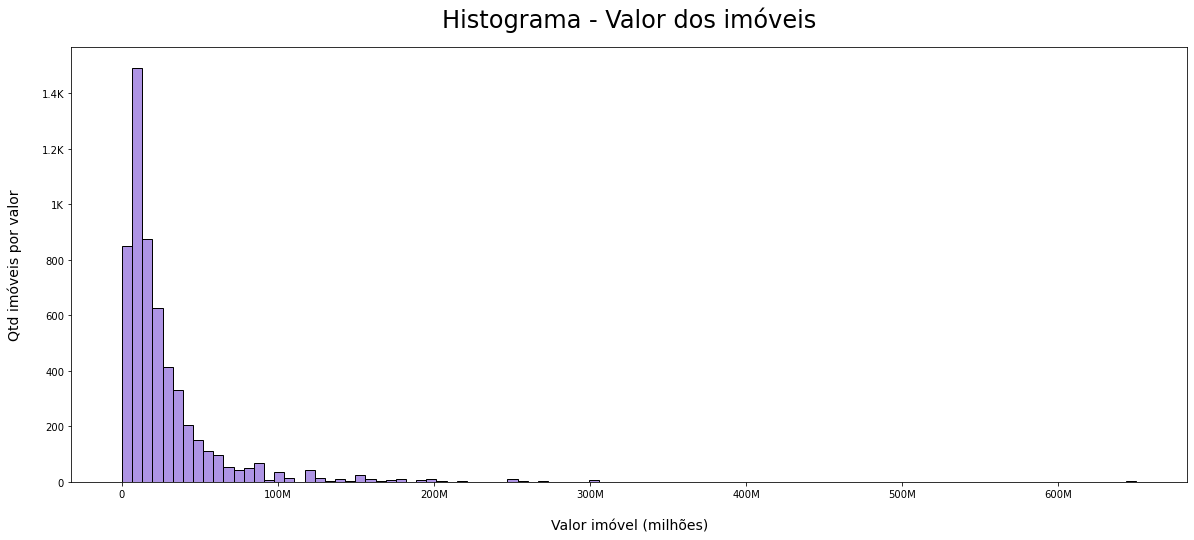

In [70]:
plt.figure(figsize = (20, 8))

ax = sns.histplot(data = dados_clean['Valor_anuncio'], color = 'mediumpurple', bins = 100)

plt.xlabel('Valor imóvel (milhões)', labelpad = 20, fontsize = 14)
plt.ylabel('Qtd imóveis por valor', labelpad = 20, fontsize = 14)

ax.xaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values));
ax.yaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values));

plt.title('Histograma - Valor dos imóveis', pad = 20, fontsize = 24);

Possíveis outliers distorcendo os dados em nossa variável alvo.

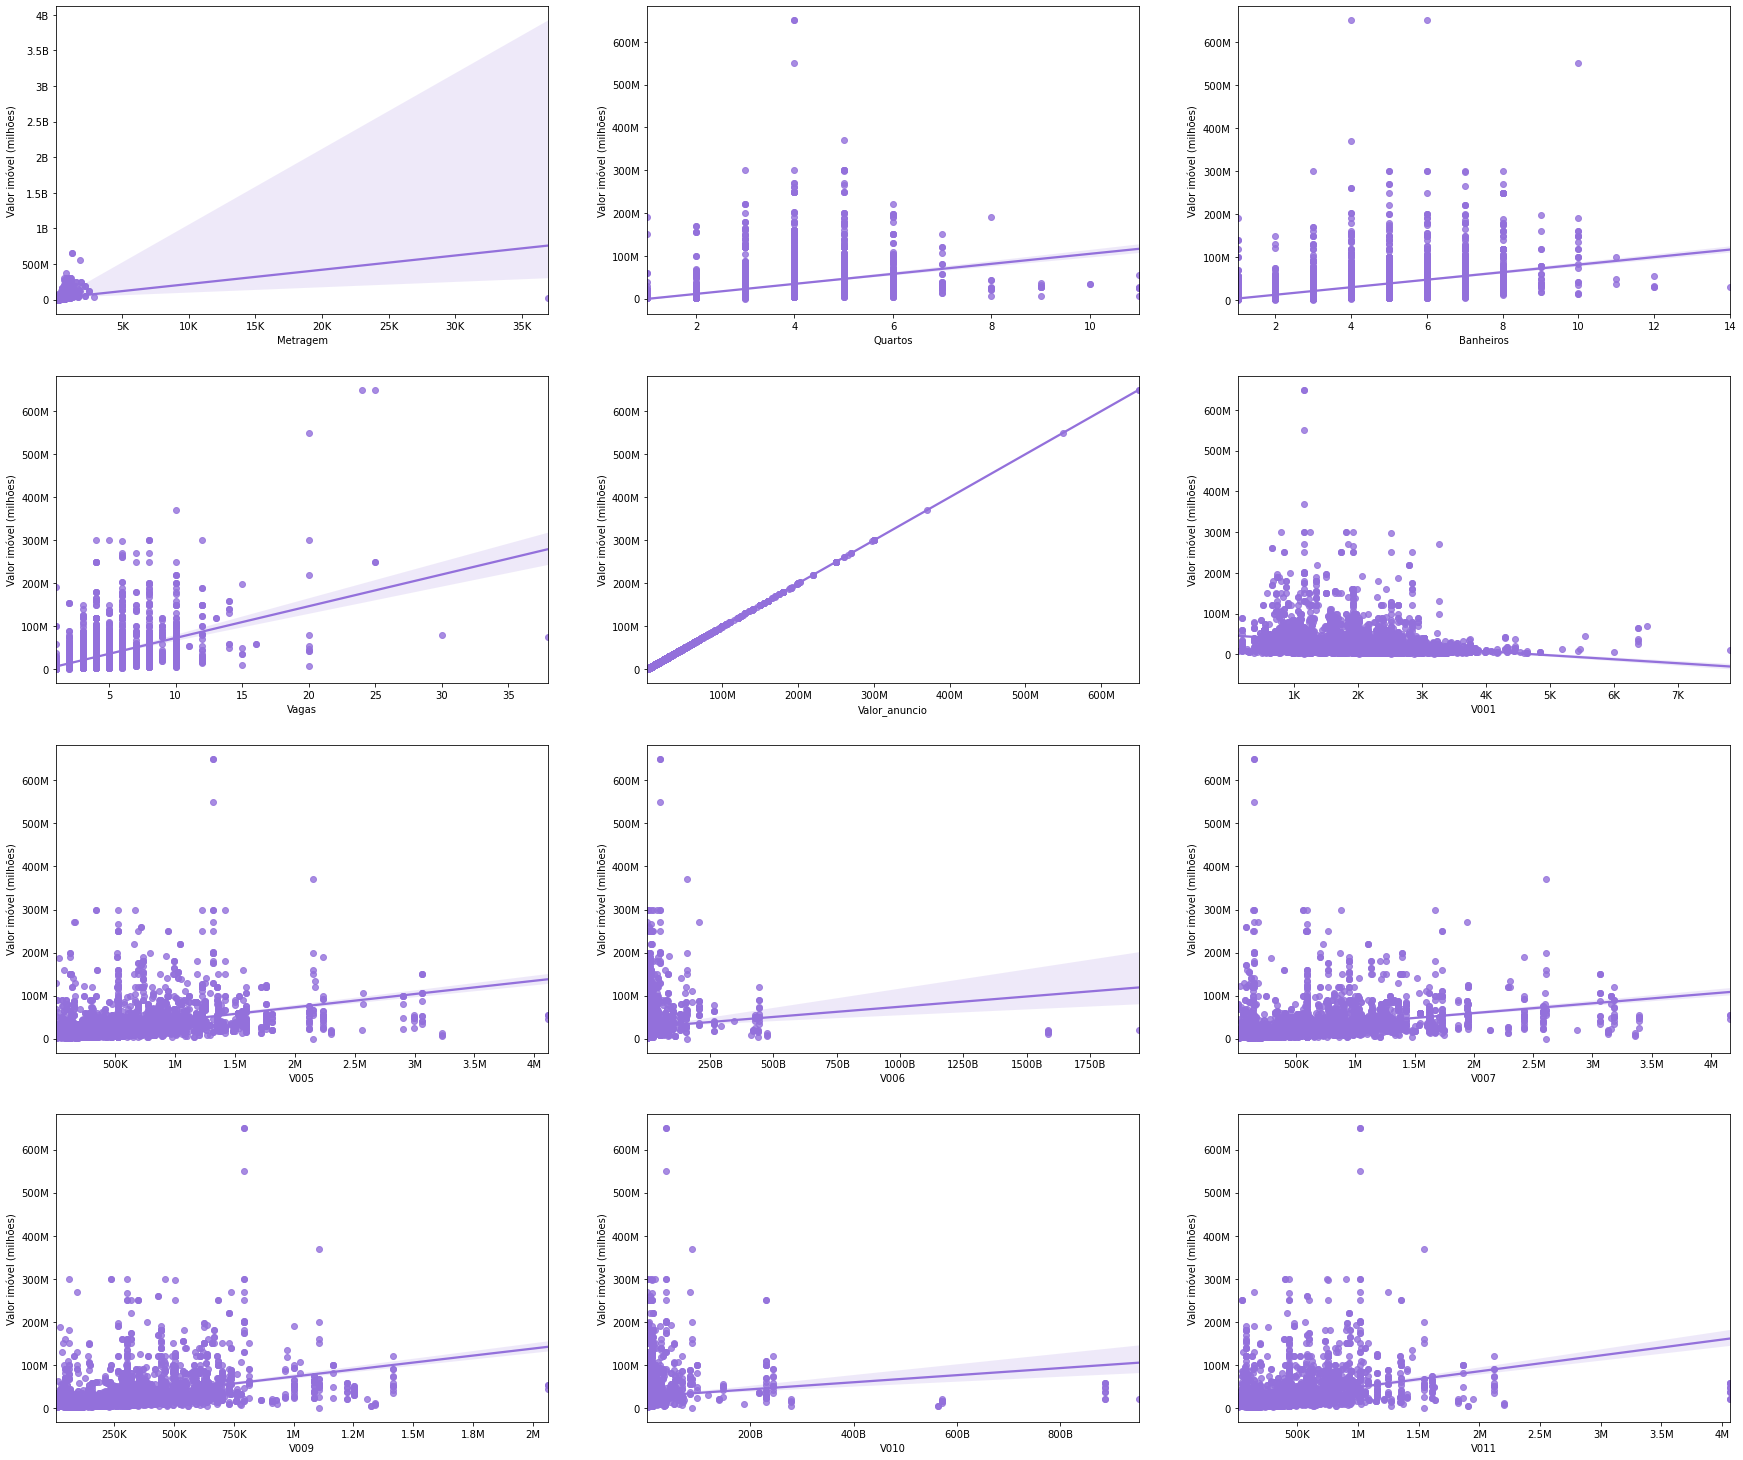

In [106]:
aux = dados_clean.drop(['Bairro'], axis = 1)

plt.figure(figsize = (30,60 ))
x = 1
for d in aux:
    plt.subplot(9, 3, x)
    ax = sns.regplot(data = aux, x = d, y = 'Valor_anuncio', color = 'mediumpurple')
    
    plt.ylabel('Valor imóvel (milhões)')
    
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values));
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values));
    
    x += 1

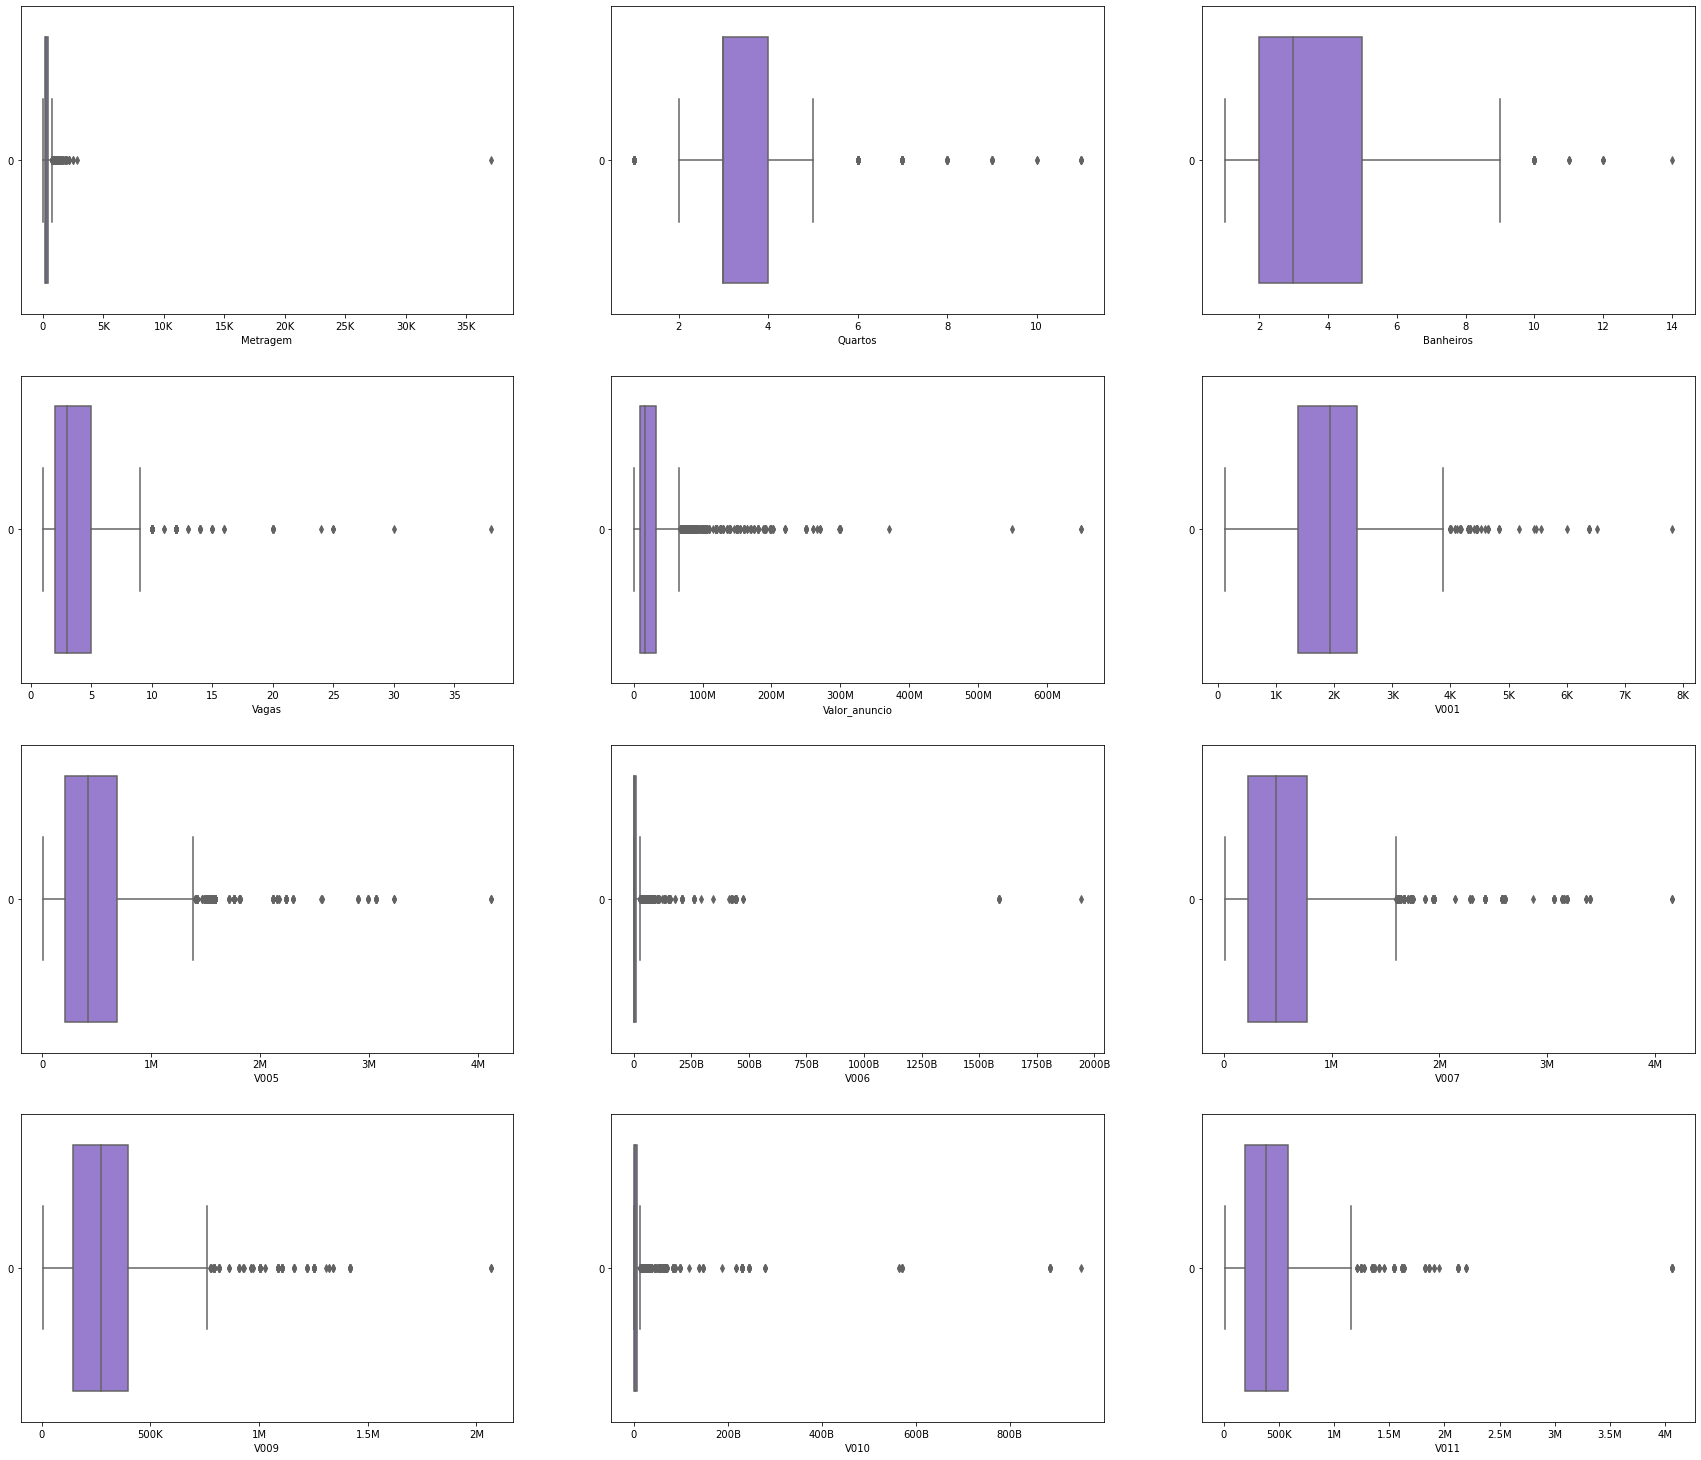

In [72]:
aux = dados_clean.drop(['Bairro'], axis = 1)

plt.figure(figsize = (30, 60 ))
x = 1
for d in aux:
    plt.subplot(9, 3, x)
    ax = sns.boxplot(data = aux, x = d, color = 'mediumpurple')
    
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values));
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values));
    
    x += 1

Visualizando os gráficos, tanto do regplot, quanto do boxplot, mais especificamente este, verifiquei outliers em todas as variáveis explicativas e na variável alvo, os quais distorcem principalmente nas variáveis metragem, valor_anuncio, V006 e V010. Faremos um corte dos pontos mais discrepantes individualmente em cada variável para efeito de comparação.

### Função para gerar boxplot de uma variável individualmente

In [73]:
def gera_simples_box_plot(dados, titulo, xlabel, ylabel):
  plt.figure(figsize = (14, 8))
  ax = sns.boxplot(data = dados)

  ax.yaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values))
  ax.xaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values))  

  plt.title(titulo, pad = 20, fontsize = 24)
  plt.xlabel(xlabel, labelpad = 20, fontsize = 14)
  plt.ylabel(ylabel, labelpad = 20, fontsize = 14)

    

  plt.show()

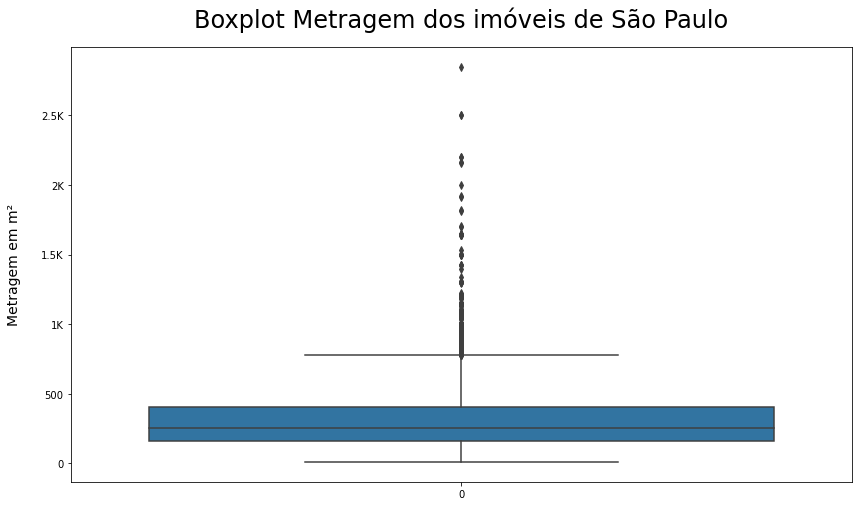

In [74]:
gera_simples_box_plot(dados_clean[['Metragem']].query('Metragem < 3000'), 
                      'Boxplot Metragem dos imóveis de São Paulo', '','Metragem em m²')

Função Describe, Boxplot

- Metragem: 75% dos dados estão abaixo da margem de 450 m², existem 3 imóveis com metragem maior que 30.000 m², sendo o mais impactante com 750.000 m²(por ora, iremos retirar da base, os imóveis com metragem > 3.000 m².

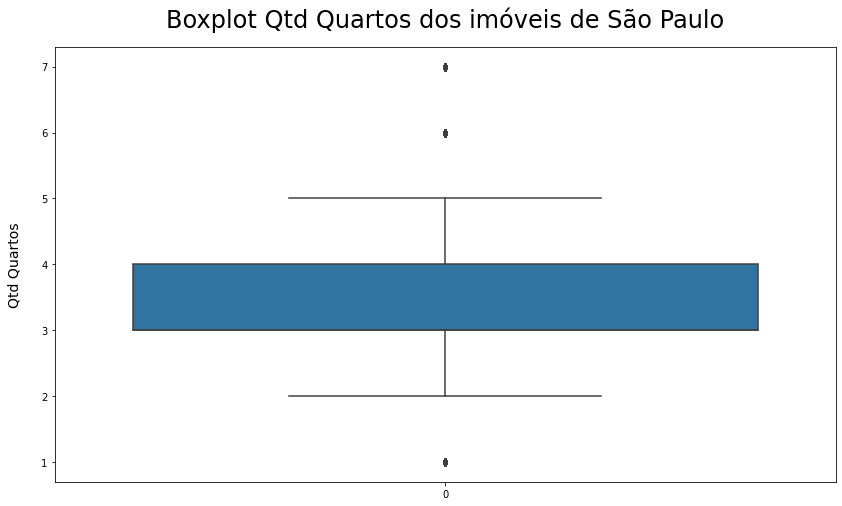

In [75]:
gera_simples_box_plot(dados_clean[['Quartos']].query('Quartos < 8'), 
                      'Boxplot Qtd Quartos dos imóveis de São Paulo', '','Qtd Quartos')

Funcão describe, boxplot

- Quartos: 75% dos dados estão abaixo da margem de 04 quartos. Existem imóveis com mais de 8, inclusive com 10, 11, 12, 13 e 16, sendo necessário uma investigação mais profunda (por ora, iremos retirar da base, os imóveis com 8 ou mais quartos). 

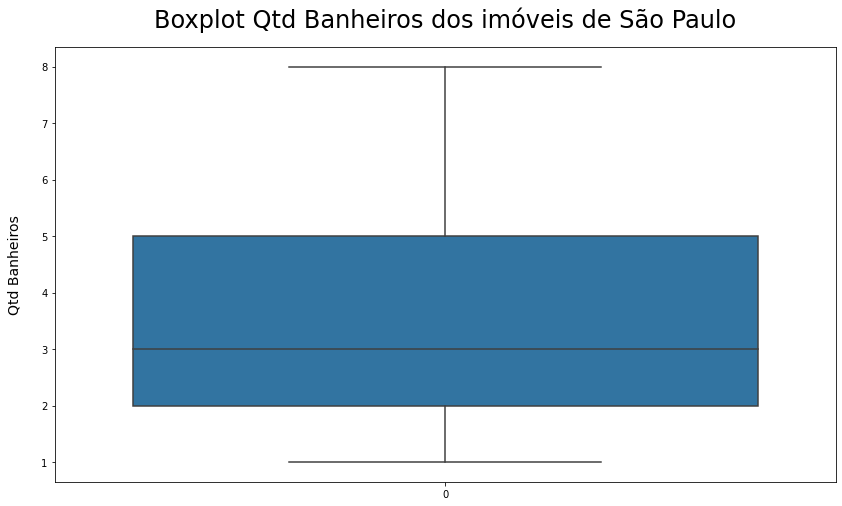

In [76]:
gera_simples_box_plot(dados_clean[['Banheiros']].query('Banheiros < 9'), 
                      'Boxplot Qtd Banheiros dos imóveis de São Paulo', '','Qtd Banheiros')

Função describe, boxplot

- Banheiros: 75% dos dados estão abaixo da margem de 05 banheiros. Existem alguns imóveis com a quantidade entre 10 e 14, e um imóvel com 40 desses, sendo necessário uma investigação mais profunda (por ora, iremos retirar da base, os imóveis com 9 ou mais banheiros).

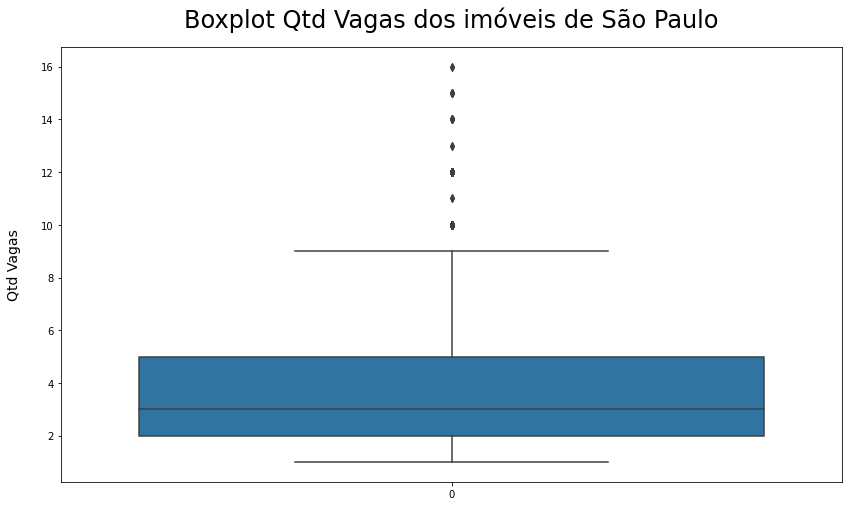

In [77]:
gera_simples_box_plot(dados_clean[['Vagas']].query('Vagas < 20'), 
                      'Boxplot Qtd Vagas dos imóveis de São Paulo', '','Qtd Vagas')

Função describe, boxplot

- Vagas: 75% dos dados estão abaixo da margem de 5 Vagas. Existem alguns imóveis com a quantidade entre 10 e 20, e imóveis com mais de 20 desses, sendo necessário uma investigação mais profunda (por ora, iremos retirar da base, os imóveis com 20 ou mais vagas).

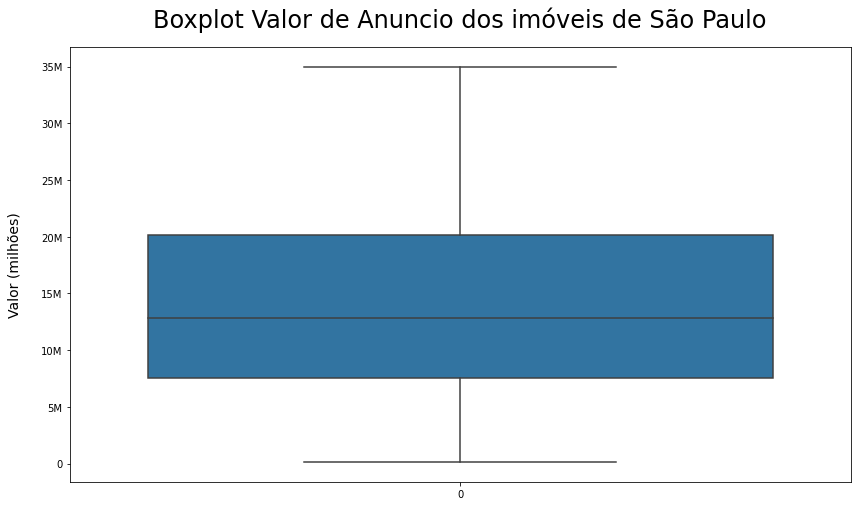

In [78]:
gera_simples_box_plot(dados_clean[['Valor_anuncio']].query('Valor_anuncio <= 35000000'), 
                      'Boxplot Valor de Anuncio dos imóveis de São Paulo', '','Valor (milhões)')

Função describe, boxplot

- Valor do anuncio: 75% dos dados estão abaixo da margem de 32 milhões. Existem alguns imóveis com valor entre 35 e 40 milhões, e imóveis com mais de 40 milhões, sendo necessário uma investigação mais profunda (por ora, iremos retirar da base, os imóveis com valor acima de 35 milhões).

In [79]:
dados_clean.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,V001,V005,V006,V007,V009,V010,V011
count,5605.00,5605.00,5605.00,5605.00,5605.00,5605.00,5605.00,5605.00,5605.00,5605.00,5605.00,5605.00
mean,332.57,3.40,3.70,3.80,27396750.09,1928.63,524211.76,14988428400.76,592914.41,302167.10,10061167331.33,435340.41
std,547.72,1.03,1.84,2.45,35958191.14,758.27,458695.08,73229418190.95,520956.02,224064.01,49829581513.31,345180.97
min,10.00,1.00,1.00,1.00,130000.00,120.00,4223.00,3324402.00,7378.00,5558.00,1909440.00,7841.00
25%,160.00,3.00,2.00,2.00,8500000.00,1380.00,203899.00,668157048.00,225959.00,142313.00,390843669.00,192485.00
50%,255.00,3.00,3.00,3.00,16000000.00,1928.63,418064.00,2544837705.00,484538.00,272766.00,1689568727.00,384117.00
75%,407.00,4.00,5.00,5.00,31800000.00,2390.00,681012.00,11278448286.00,775688.00,395048.00,5943448837.00,581525.00
max,37000.00,11.00,14.00,38.00,650000000.00,7810.00,4117573.00,1943667903742.00,4160916.00,2065194.00,952154509267.00,4065397.00


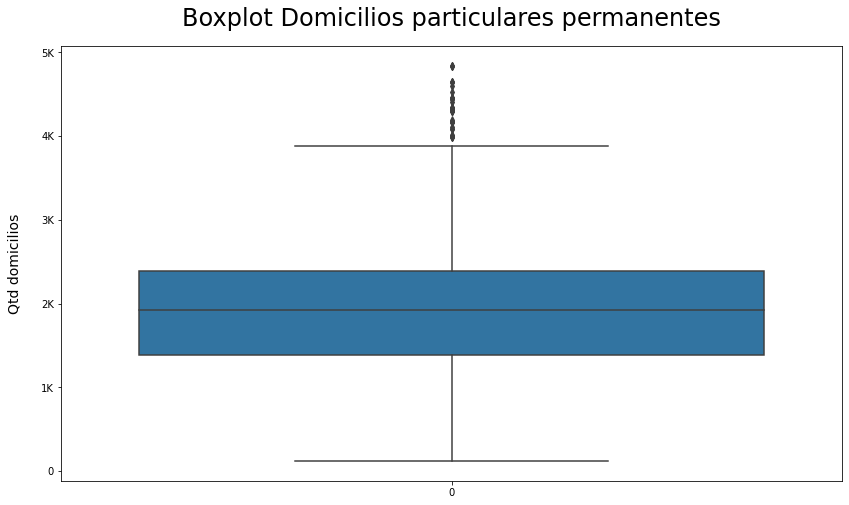

In [80]:
gera_simples_box_plot(dados_clean[['V001']].query('V001 < 5000'), 
                      'Boxplot Domicilios particulares permanentes', '','Qtd domicilios')

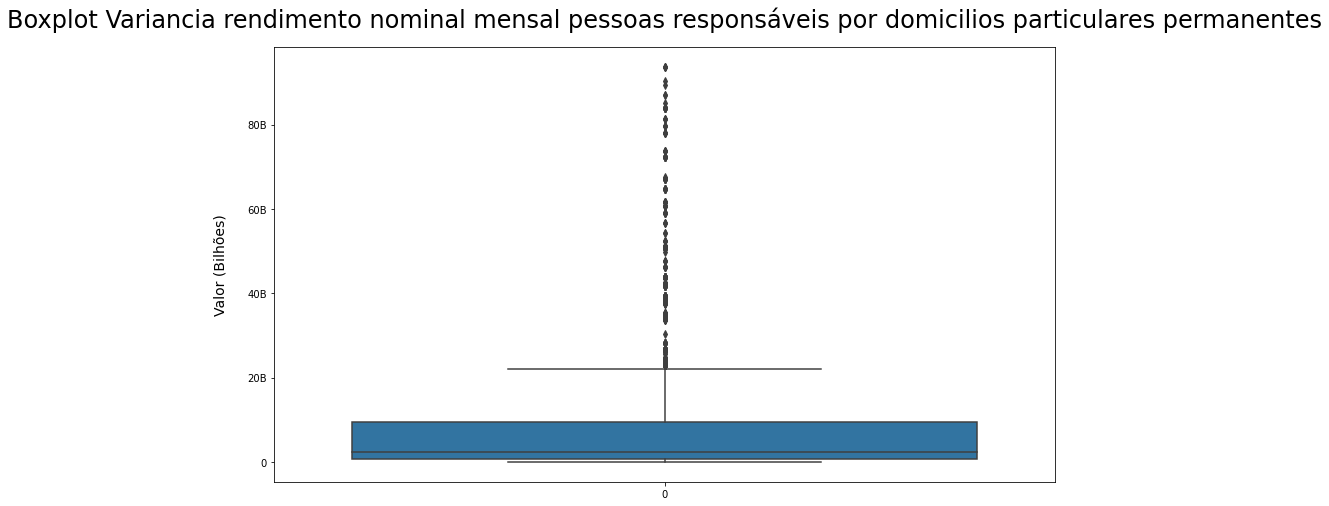

In [81]:
gera_simples_box_plot(dados_clean[['V006']].query('V006 < 100000000000'), 
                      'Boxplot Variancia rendimento nominal mensal pessoas responsáveis por domicilios particulares permanentes', '','Valor (Bilhões)')

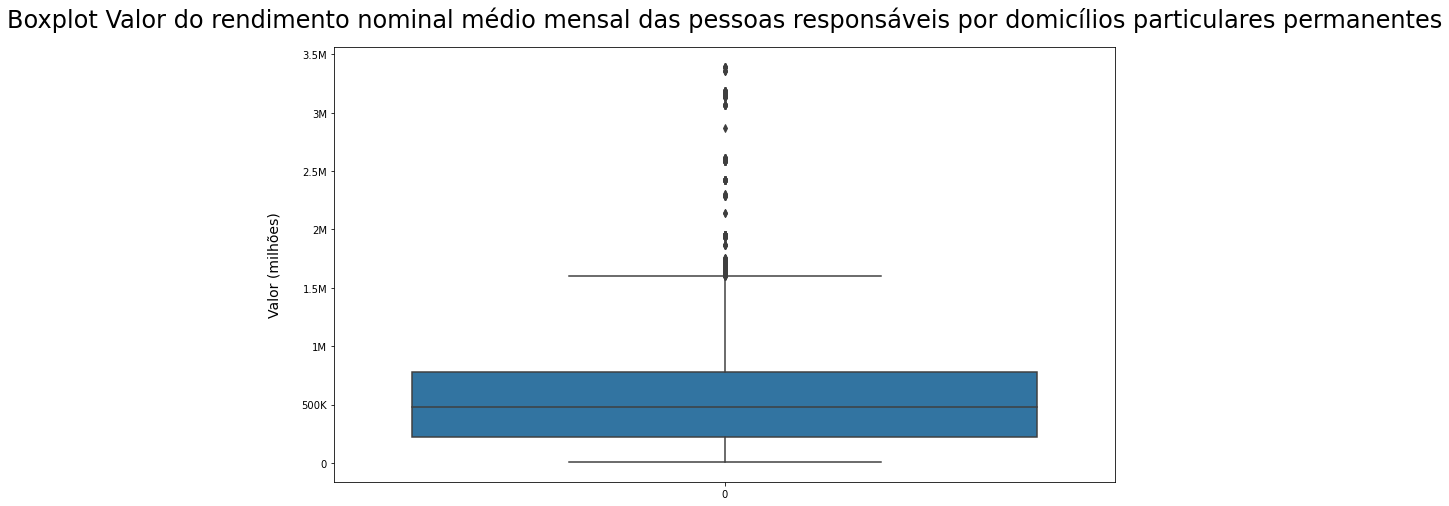

In [82]:
gera_simples_box_plot(dados_clean[['V007']].query('V007 < 3500000'), 
                      'Boxplot Valor do rendimento nominal médio mensal das pessoas responsáveis por domicílios particulares permanentes', '','Valor (milhões)')

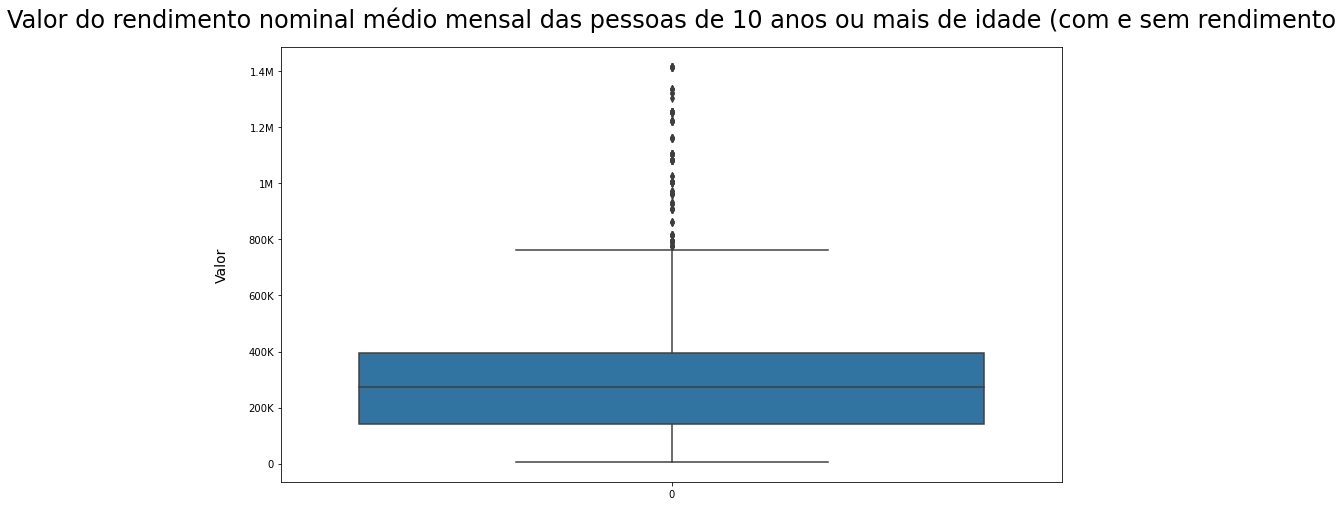

In [83]:
gera_simples_box_plot(dados_clean[['V009']].query('V009 < 1500000'), 
                      'Valor do rendimento nominal médio mensal das pessoas de 10 anos ou mais de idade (com e sem rendimento', '','Valor')

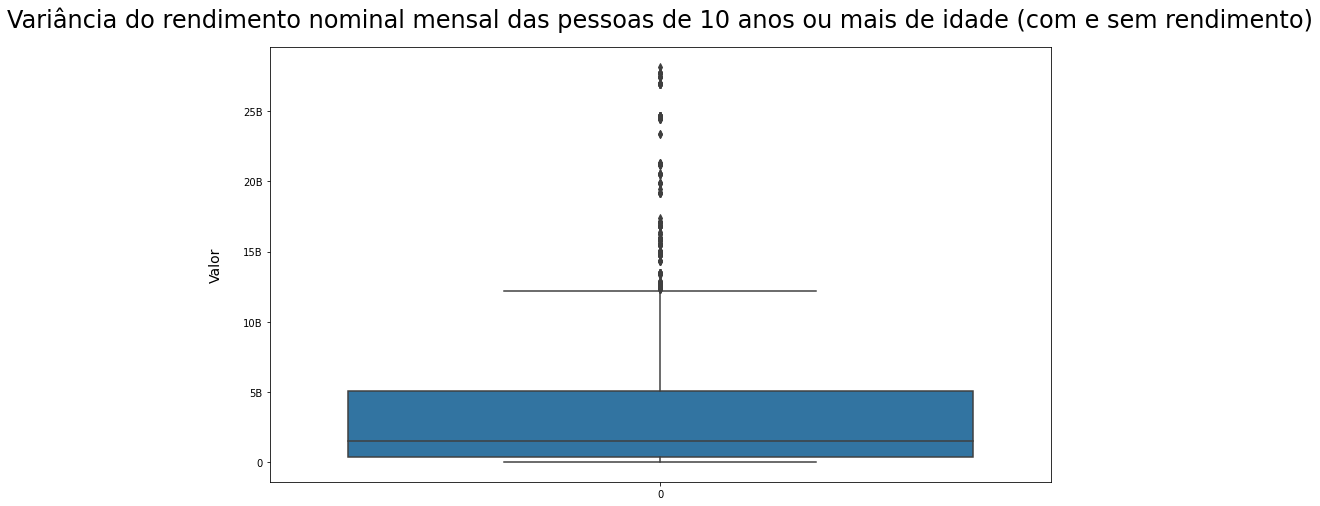

In [84]:
gera_simples_box_plot(dados_clean[['V010']].query('V010 < 30000000000'), 
                      'Variância do rendimento nominal mensal das pessoas de 10 anos ou mais de idade (com e sem rendimento)', '','Valor')

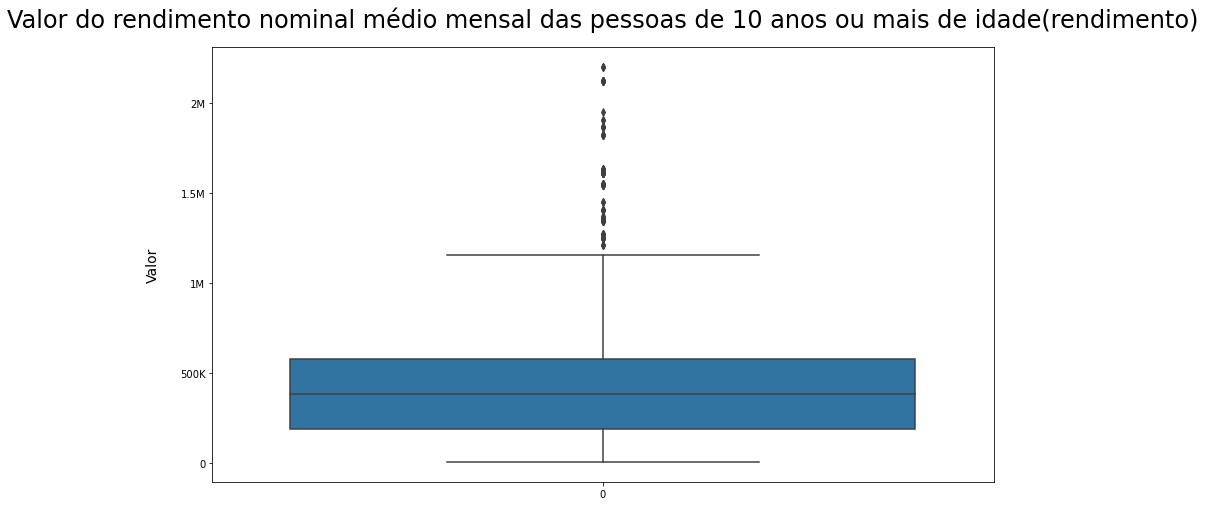

In [85]:
gera_simples_box_plot(dados_clean[['V011']].query('V011 < 2500000'), 
                      'Valor do rendimento nominal médio mensal das pessoas de 10 anos ou mais de idade(rendimento)', '','Valor')

Através dos cortes nos outliers, verifiquei que a distruição dos dados das variáveis atingidas ficou melhor apresentável, menos distorcida. Esses dados que serão retirados possivelmente trariam maleficios no treinamento do modelo, por se tratar de valores bastante discrepantes.

In [86]:
dados_clean.drop(dados_clean.query('Valor_anuncio > 35000000 or Valor_anuncio < 100000 or Metragem > 3000 or Quartos >= 8 or Banheiros > 10 or Vagas > 21 or V006 > 100000000000 or  V010 > 30000000000').index)

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,V001,V005,V006,V007,V009,V010,V011
2,Jardim Reimberg,125,4,3,2,3800000,1420.00,80513.00,76918878.00,101175.00,51877.00,42667278.00,85851.00
3,Mooca,100,3,2,2,5400000,1560.00,233805.00,782637015.00,244789.00,154329.00,464656616.00,190904.00
4,Santo Amaro,440,4,4,6,19800000,1070.00,102636.00,27216867.00,114396.00,73567.00,36708808.00,108694.00
5,Cidade Mãe do Céu,145,4,4,2,8500000,2220.00,158084.00,444078958.00,189701.00,128445.00,257838456.00,174339.00
6,Jardim Vergueiro,150,2,2,2,4500000,3050.00,161393.00,3333239049.00,172115.00,88061.00,1270017103.00,133363.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5599,Vila Olímpia,157,3,2,2,9600000,1770.00,505458.00,3324518973.00,523193.00,364906.00,2656223253.00,455166.00
5600,Planalto Paulista,267,3,6,4,15000000,2560.00,424933.00,2449987144.00,518014.00,261876.00,1770503231.00,397793.00
5601,Vila Sofia,95,2,2,2,6650000,1500.00,242509.00,687887225.00,25438.00,156158.00,426181401.00,206209.00
5603,Vila da Saúde,205,3,3,6,10500000,4000.00,56502.00,2034462214.00,575084.00,345968.00,160218256.00,436279.00


### Retirando os dados discrepantes da base de dados

In [87]:
dados_sem_outliers = dados_clean.query('Valor_anuncio <= 35000000 or Valor_anuncio > 100000 or Metragem < 3000 or Quartos < 8 or Banheiros < 10 or Vagas < 21 or V006 < 100000000000 or  V010 < 30000000000')


In [88]:
dados_sem_outliers.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,V001,V005,V006,V007,V009,V010,V011
count,5605.00,5605.00,5605.00,5605.00,5605.00,5605.00,5605.00,5605.00,5605.00,5605.00,5605.00,5605.00
mean,332.57,3.40,3.70,3.80,27396750.09,1928.63,524211.76,14988428400.76,592914.41,302167.10,10061167331.33,435340.41
std,547.72,1.03,1.84,2.45,35958191.14,758.27,458695.08,73229418190.95,520956.02,224064.01,49829581513.31,345180.97
min,10.00,1.00,1.00,1.00,130000.00,120.00,4223.00,3324402.00,7378.00,5558.00,1909440.00,7841.00
25%,160.00,3.00,2.00,2.00,8500000.00,1380.00,203899.00,668157048.00,225959.00,142313.00,390843669.00,192485.00
50%,255.00,3.00,3.00,3.00,16000000.00,1928.63,418064.00,2544837705.00,484538.00,272766.00,1689568727.00,384117.00
75%,407.00,4.00,5.00,5.00,31800000.00,2390.00,681012.00,11278448286.00,775688.00,395048.00,5943448837.00,581525.00
max,37000.00,11.00,14.00,38.00,650000000.00,7810.00,4117573.00,1943667903742.00,4160916.00,2065194.00,952154509267.00,4065397.00


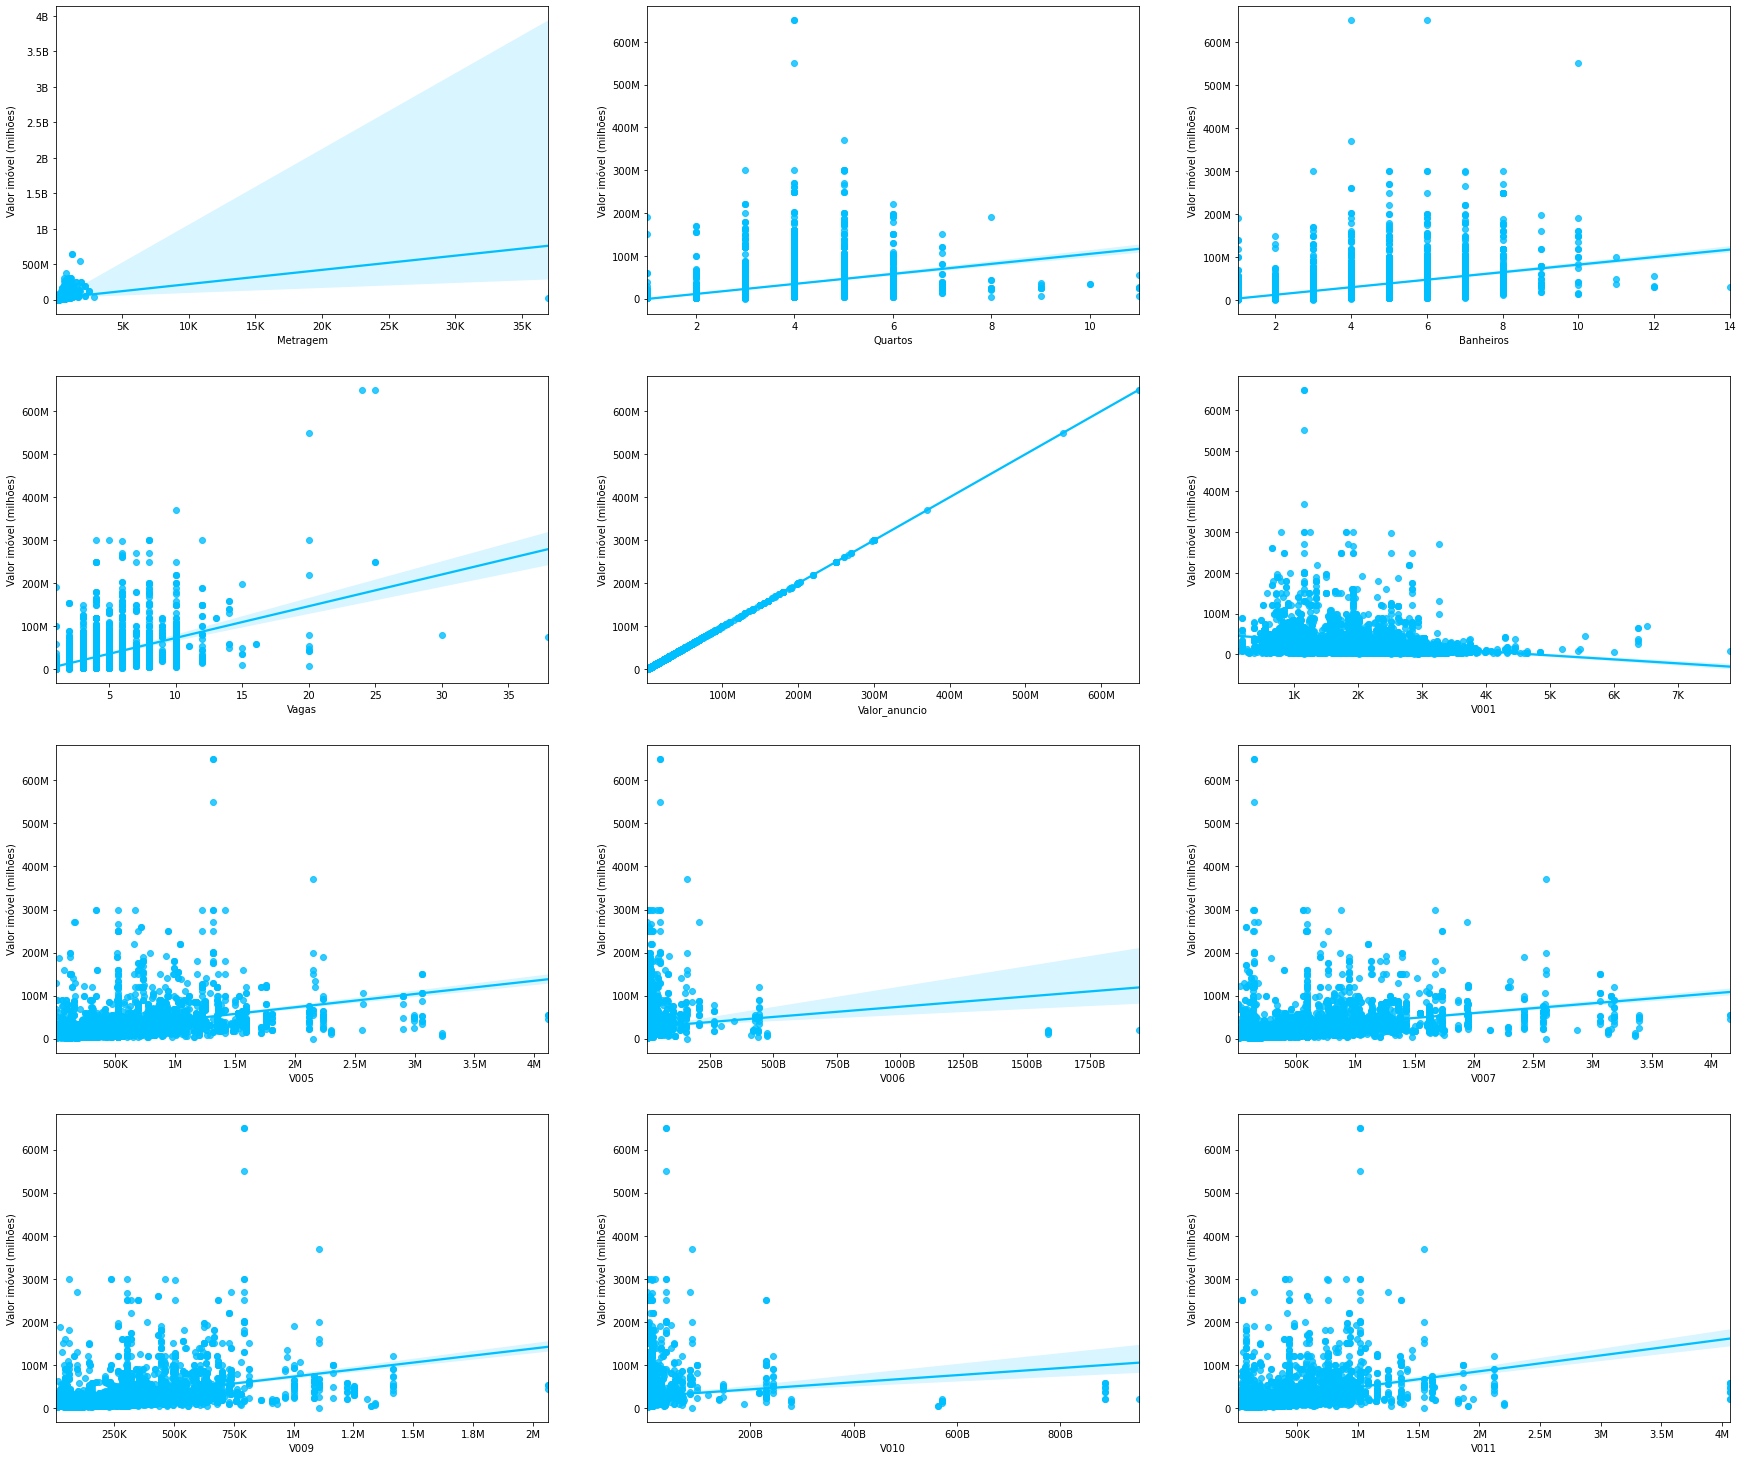

In [108]:
aux = dados_sem_outliers.drop(['Bairro'], axis = 1)

plt.figure(figsize = (30,60 ))
x = 1
for d in aux:
    plt.subplot(9, 3, x)
    ax = sns.regplot(data = dados_sem_outliers.drop(['Bairro'], axis = 1), x = d, y = 'Valor_anuncio', color = 'deepskyblue')
    
    plt.ylabel('Valor imóvel (milhões)')
    
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values));
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values));
    
    x += 1

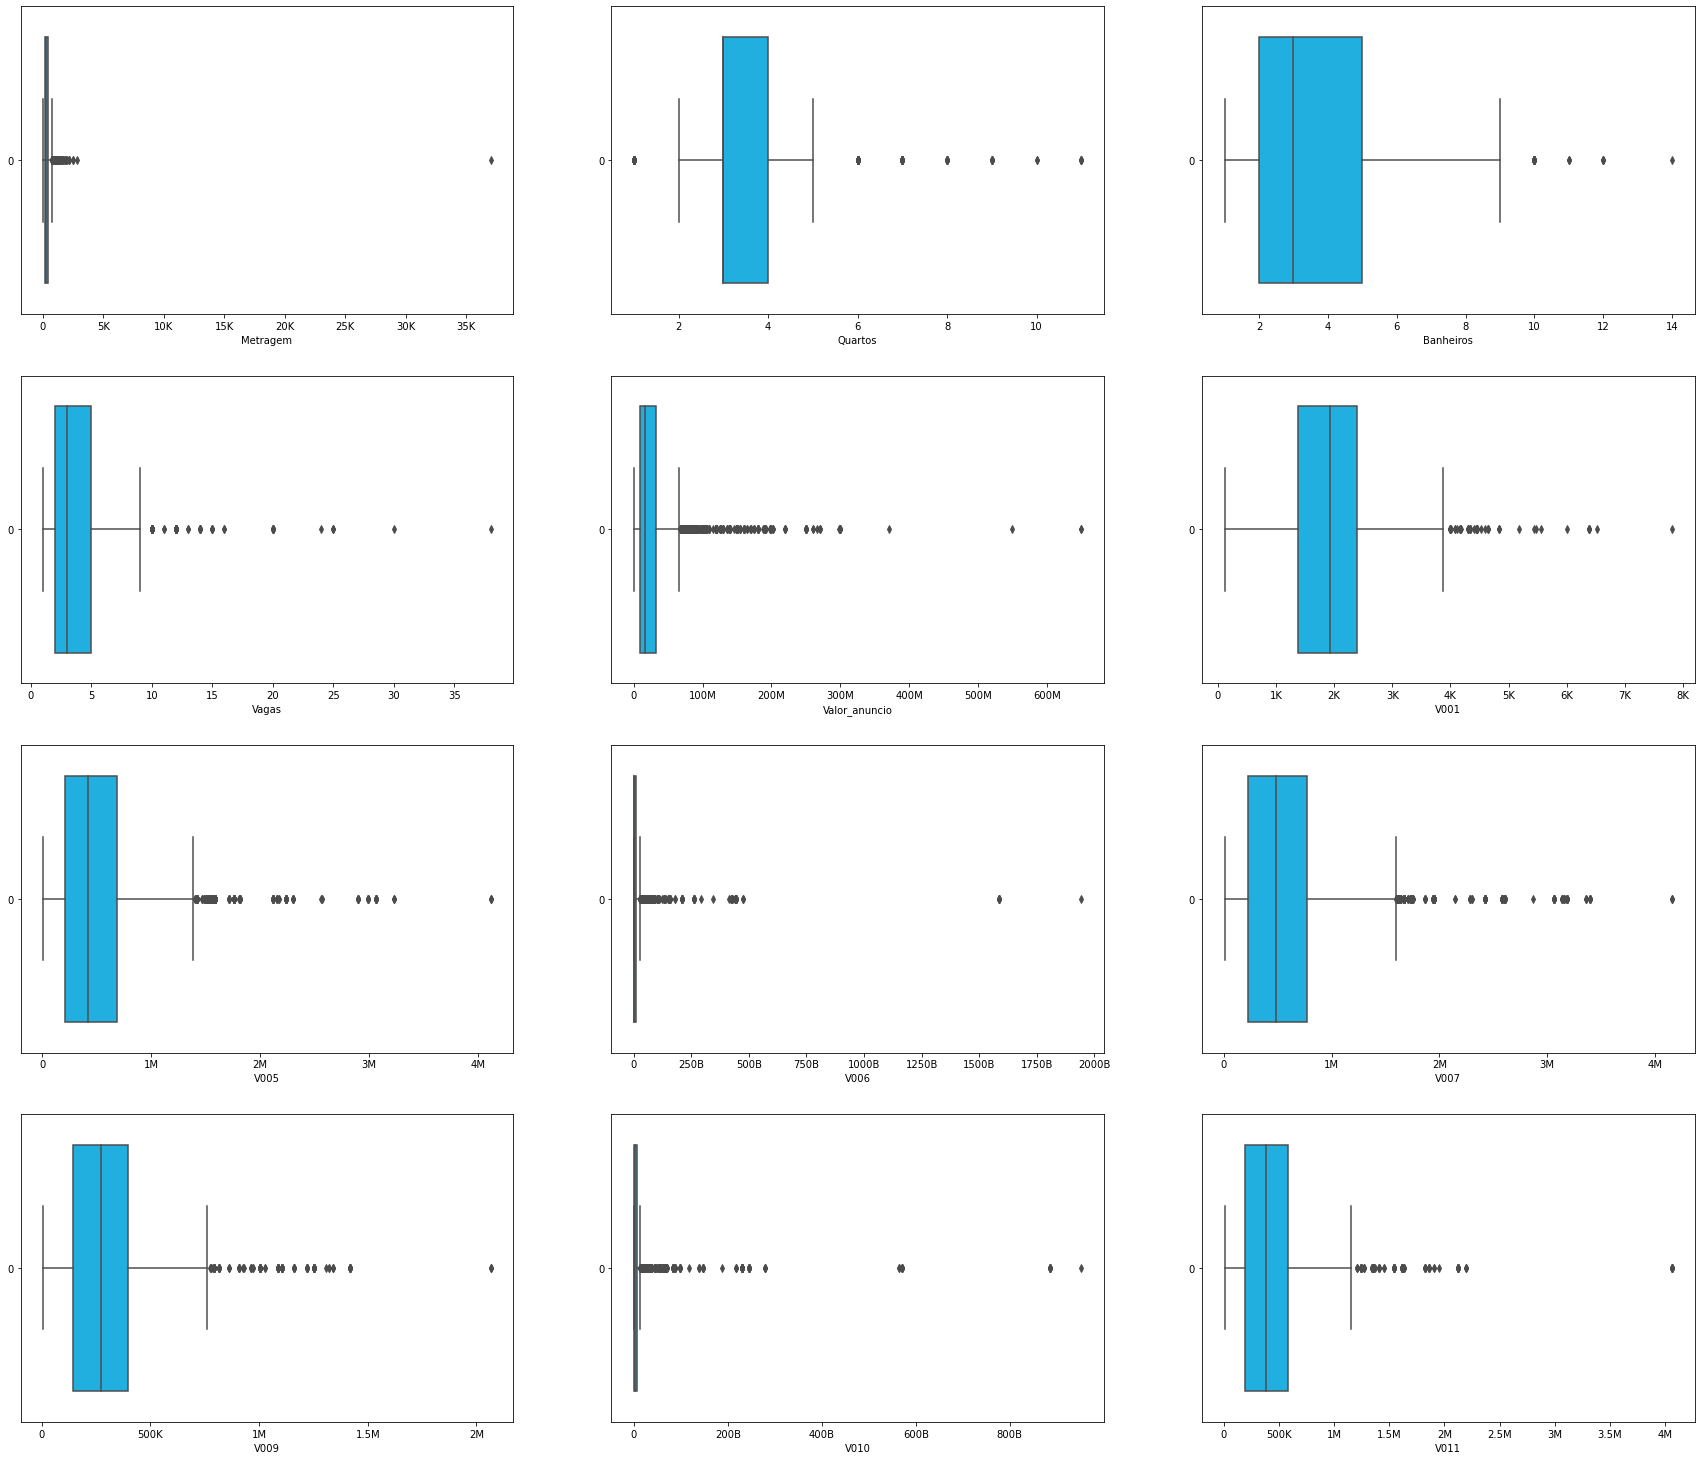

In [109]:
aux = dados_sem_outliers.drop(['Bairro'], axis = 1)

plt.figure(figsize = (30, 60 ))
x = 1
for d in aux:
    plt.subplot(9, 3, x)
    ax = sns.boxplot(data = aux, x = d, color = 'deepskyblue')
    
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values));
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values));
    
    x += 1

Função corr mais uma vez para verificar se, ao retirar os outliers, houve alguma modificação relevante.

In [110]:
dados_sem_outliers.corr()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,V001,V005,V006,V007,V009,V010,V011
Metragem,1.00,0.23,0.25,0.28,0.30,-0.13,0.18,0.05,0.18,0.19,0.07,0.16
Quartos,0.23,1.00,0.53,0.40,0.34,-0.18,0.28,0.08,0.28,0.28,0.11,0.26
Banheiros,0.25,0.53,1.00,0.45,0.45,-0.22,0.34,0.09,0.35,0.37,0.10,0.33
Vagas,0.28,0.40,0.45,1.00,0.50,-0.21,0.29,0.09,0.29,0.29,0.11,0.27
Valor_anuncio,0.30,0.34,0.45,0.50,1.00,-0.21,0.39,0.10,0.33,0.40,0.11,0.35
V001,-0.13,-0.18,-0.22,-0.21,-0.21,1.00,-0.34,-0.09,-0.36,-0.32,-0.13,-0.29
V005,0.18,0.28,0.34,0.29,0.39,-0.34,1.00,0.34,0.78,0.72,0.31,0.64
V006,0.05,0.08,0.09,0.09,0.10,-0.09,0.34,1.00,0.43,0.36,0.62,0.39
V007,0.18,0.28,0.35,0.29,0.33,-0.36,0.78,0.43,1.00,0.72,0.32,0.70
V009,0.19,0.28,0.37,0.29,0.40,-0.32,0.72,0.36,0.72,1.00,0.42,0.74


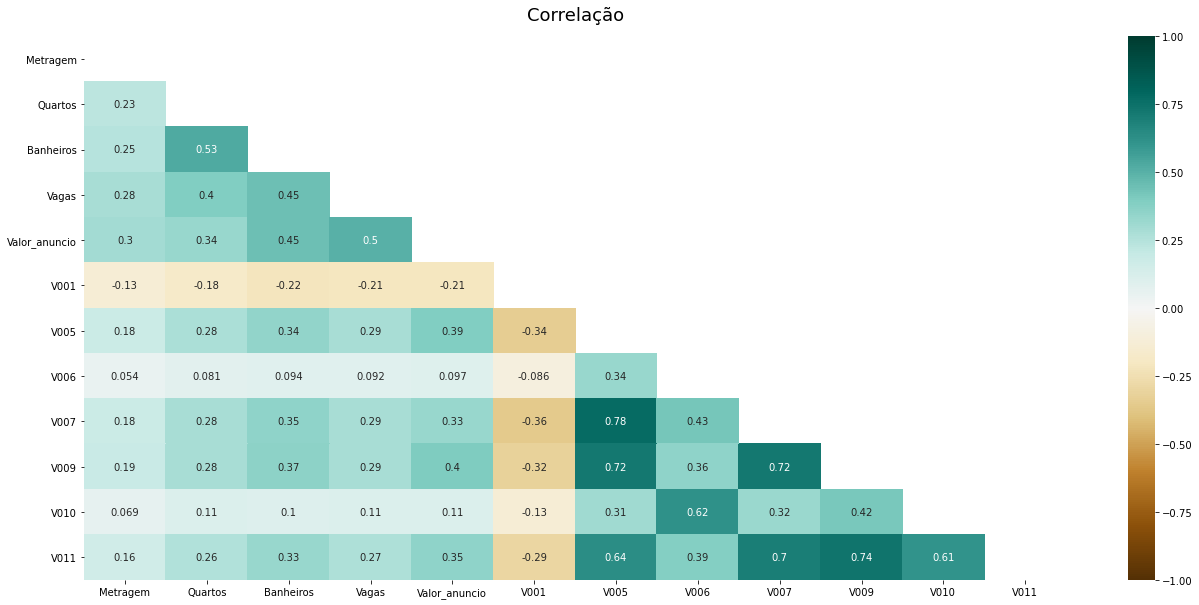

In [92]:
# https://www.tylervigen.com/spurious-correlations
plt.figure(figsize = (22, 10))
mask = np.triu(np.ones_like(dados_sem_outliers.corr(), dtype = bool))
heatmap = sns.heatmap(dados_sem_outliers.corr(), mask = mask, vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')
heatmap.set_title('Correlação', fontdict = {'fontsize': 18}, pad = 16)

plt.show()

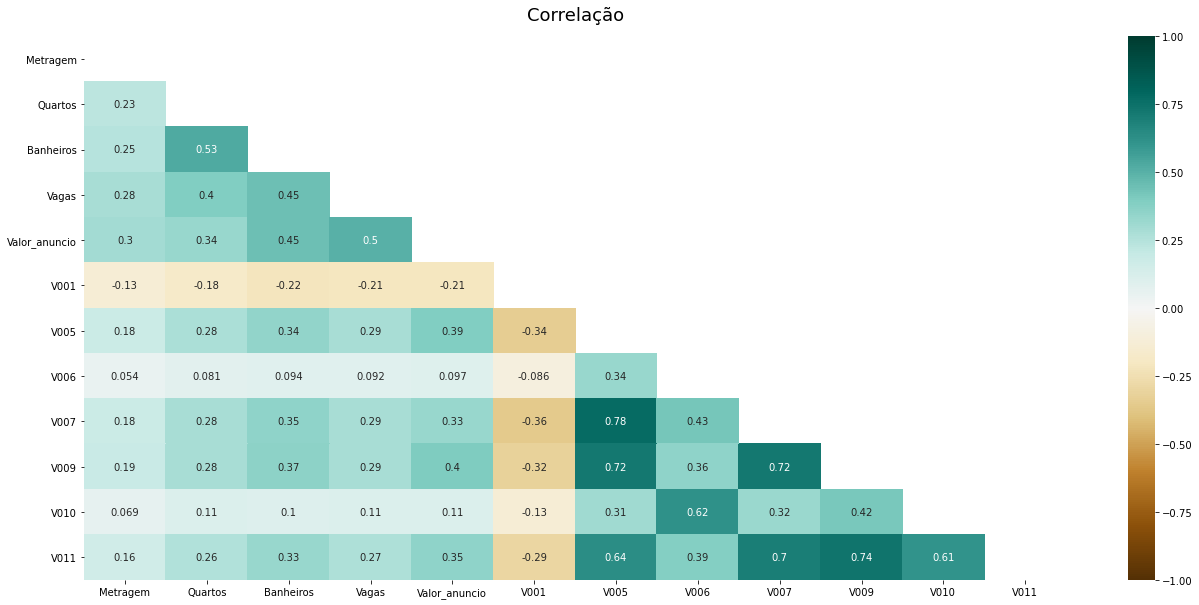

In [93]:
# https://www.tylervigen.com/spurious-correlations
plt.figure(figsize = (22, 10))
mask = np.triu(np.ones_like(dados_clean.corr(), dtype = bool))
heatmap = sns.heatmap(dados_clean.corr(), mask = mask, vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')
heatmap.set_title('Correlação', fontdict = {'fontsize': 18}, pad = 16)

plt.show()

Não identifiquei alguma alteração nas correlações antes da retirada dos outliers.

### Com a base de dados relativamente pronta, irei começar os treinamentos do modelo

# Treinamentos do modelo

Primeiro modelo para termos nossa baseline, algoritmo simples de Regressão Linear com todas as variáveis.

## Modelo LinearRegression

In [94]:
dados_sem_outliers.columns

Index(['Bairro', 'Metragem', 'Quartos', 'Banheiros', 'Vagas', 'Valor_anuncio',
       'V001', 'V005', 'V006', 'V007', 'V009', 'V010', 'V011'],
      dtype='object')

In [95]:
X = dados_sem_outliers[['Metragem', 'Quartos', 'Banheiros', 'Vagas', 'V001', 'V005', 'V006', 'V007', 'V009', 'V010', 'V011']]

y = dados_sem_outliers['Valor_anuncio']

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 54)

lr = LinearRegression()

lr.fit(X_train, y_train) 

LinearRegression()

In [97]:
y_pred = lr.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)

In [98]:
print(mae_lr)
print(r2_lr)

14459411.617403306
0.4038032105180911


Visualizando no gráfico scatterplot, os dados previstos e os dados de teste para comparação.

<AxesSubplot:title={'center':'Previsão X Real'}, xlabel='Valor imóvel - Previsão', ylabel='Valor imóvel - Real'>

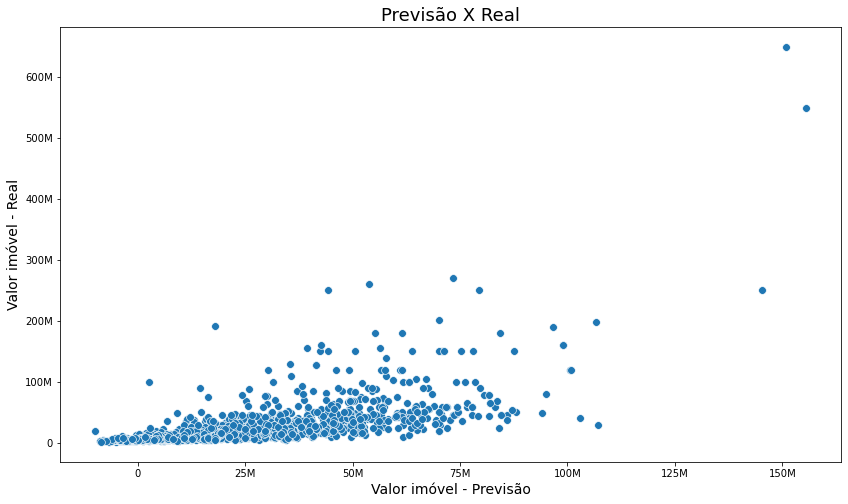

In [99]:
ax = sns.scatterplot(x=y_pred, y=y_test, s = 60)
ax.figure.set_size_inches(14, 8)
ax.set_title('Previsão X Real', fontsize=18)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values));
ax.xaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values));

ax.set_xlabel('Valor imóvel - Previsão', fontsize=14)
ax.set_ylabel('Valor imóvel - Real', fontsize=14)
ax

## Modelo RandomForest

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 54)

rf = RandomForestRegressor(n_estimators=10)
rf.fit(X,y)

rf.fit(X_train, y_train) 

RandomForestRegressor(n_estimators=10)

In [101]:
y_pred = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

In [102]:
print(mae_rf)
print(r2_rf)

7645123.322583384
0.757980776144257


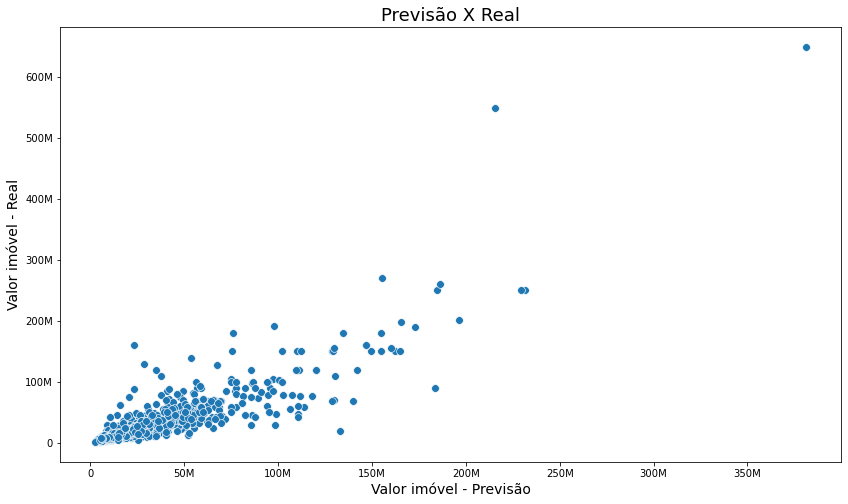

In [103]:
ax = sns.scatterplot(x=y_pred, y=y_test, s = 60)
ax.figure.set_size_inches(14, 8)
ax.set_title('Previsão X Real', fontsize=18)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values));
ax.xaxis.set_major_formatter(ticker.FuncFormatter(reformat_large_tick_values));

ax.set_xlabel('Valor imóvel - Previsão', fontsize=14)
ax.set_ylabel('Valor imóvel - Real', fontsize=14)

plt.show()

Posso verificar, em ambos gráficos de dispersão, que o modelo tende a ser um pouco mais eficaz na predição de imóveis com valor abaixo de 15 milhões, e menos eficaz com o aumento desse. Hipótese de, na base de dados, existirem menos dados com valores maiores que esse valor. O que podemos afirmar: para tal análise, seriam necessários mais dados para melhor entendimento do negócio e assim, melhorar a predição.